In [1]:
import sys
sys.path.insert(0, './utility/')
import feature_selection as fs
import classification_models as cm

In [2]:
import pickle
import pandas as pd

In [3]:
import importlib
importlib.reload(cm)
importlib.reload(fs)

<module 'feature_selection' from './utility\\feature_selection.py'>

In [23]:
import classification_models2 as cm2

In [28]:
importlib.reload(cm2)

<module 'classification_models2' from './utility\\classification_models2.py'>

In [4]:
processed_data_filename = 'processed_data_20230421_164720.pickle'
processed_data_path = f'./data/{processed_data_filename}'

df = pd.read_pickle(processed_data_path)

In [5]:
df.shape

(876170, 115)

In [6]:
df.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,...,home_ownership_nan,verification_status_Source Verified,verification_status_Verified,verification_status_nan,term_ 60 months,term_nan,next_pymnt_d_Jan-2016,next_pymnt_d_Mar-2016,next_pymnt_d_nan,label
0,-1.203909,-0.616915,-1.301341,1.217976,-0.453552,0.381301,-0.093288,-0.013627,-1.400648,-0.424777,...,0,0,1,0,0,0,0,0,1,0
1,-1.377846,0.516883,-1.241445,-1.641569,-0.453552,2.633161,-0.093288,-0.013627,-1.400648,-0.424777,...,0,1,0,0,1,0,0,0,1,1
2,-1.377846,0.686216,-1.301341,-1.194287,-0.453552,1.507231,-0.093288,-0.013627,-1.400648,-0.424777,...,0,0,0,0,0,0,0,0,1,0
3,-0.582706,0.080052,-0.666436,0.243131,-0.453552,0.381301,0.191932,-0.013627,-0.300568,-0.424777,...,0,1,0,0,0,0,0,0,1,0
4,-1.377846,-0.116277,0.255973,-0.019376,-0.453552,-0.744628,0.405847,-0.013627,0.799513,-0.424777,...,0,1,0,0,1,0,0,0,0,0


In [7]:
df.columns

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec',
       ...
       'home_ownership_nan', 'verification_status_Source Verified',
       'verification_status_Verified', 'verification_status_nan',
       'term_ 60 months', 'term_nan', 'next_pymnt_d_Jan-2016',
       'next_pymnt_d_Mar-2016', 'next_pymnt_d_nan', 'label'],
      dtype='object', length=115)

In [13]:
# Perform feature selection

top_n_features = fs.select_features(X = df.drop(columns = ['label']), 
                   y = df['label'], 
                   ml_type = 'classification',
                   n_features_to_select = 30,                 
                   n_samples = 100000)

INFO:root:Starting feature selection...
INFO:root:Feature selection completed in 1264.87 seconds


In [14]:
top_n_features 

['loan_amnt',
 'int_rate',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'total_pymnt',
 'total_rec_int',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'emp_length_10+ years',
 'emp_length_2 years',
 'emp_length_3 years',
 'emp_length_4 years',
 'emp_length_5 years',
 'emp_length_6 years',
 'emp_length_7 years',
 'emp_length_8 years',
 'emp_length_9 years',
 'emp_length_< 1 year',
 'emp_length_nan',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_home_improvement',
 'purpose_house',
 'purpose_major_purchase',
 'purpose_medical',
 'purpose_moving',
 'purpose_other',
 'purpose_renewable_energy',
 'purpose_small_business',
 'purpose_vacation',
 'purpose_wedding',
 'sub_grade_A2',
 'sub_grade_A3',
 'sub_grade_A4',
 'sub_grade_B3',
 'sub_grade_B4',
 'sub_grade_B5',
 '

In [15]:
X_processed = df[top_n_features]
y = df['label']

Logistic Regression: Done (Execution Time: 29.06 seconds)
KNN: Done (Execution Time: 0.24 seconds)


MemoryError: 

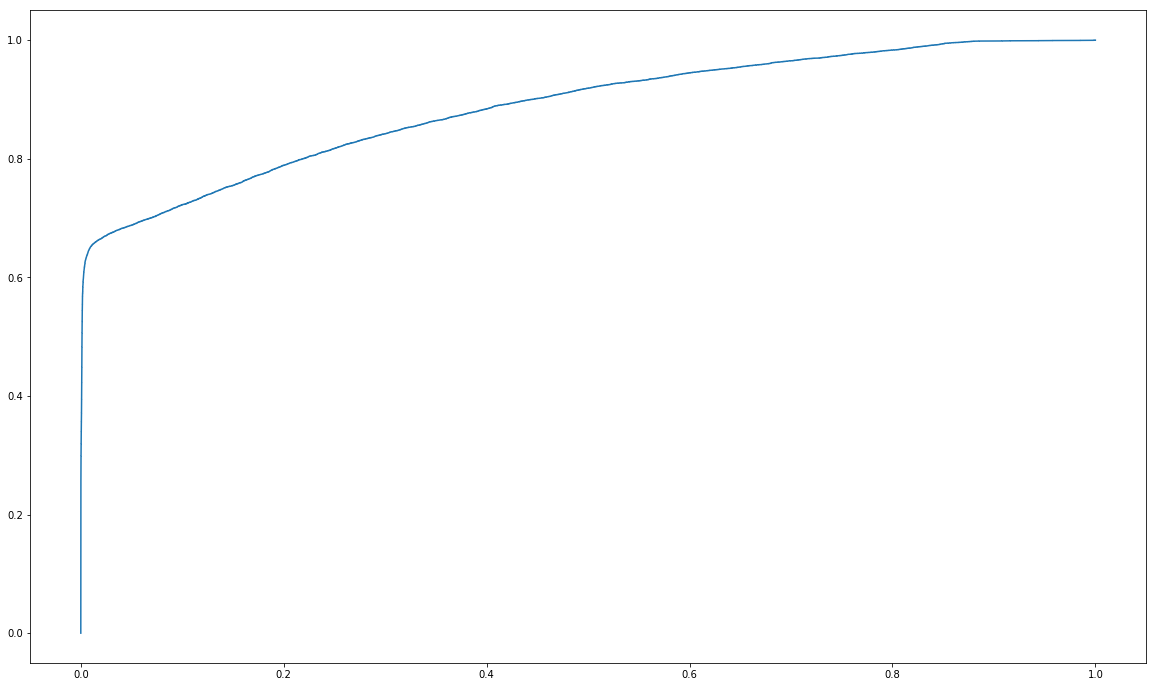

In [29]:
cm2.run_classification_models(X_processed, y, search_type = None, time_limit = 600)